# Supervised Machine Learning Using TensorFlow 2#

## Regressão Linear ##

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Inicializando as constantes

In [6]:
n_examples = 1000 # conjunto de treinamento
training_steps = 1000 # quantidade de vezes que a rede será treinada
display_step = 10 # a cada múltiplo de 10 mostramos a função custo(loss)
learning_rate = 0.01 # taxa de aprendizagem
m, c = 6, -5 # gradiente e y-intercept da linha

Conjunto de treino

In [7]:
def train_data(n, m, c):
    x = tf.random.normal([n])
    noise = tf.random.normal([n])

    y = m*x + c + noise

    return x, y

Cálculo de *prediction*

In [8]:
def prediction(x, weight, bias):
    return x*weight + bias

Função Custo(*loss*)



In [9]:
def loss(x, y, weights, biases):
    error = prediction(x, weights, biases) - y
    squared_error = tf.square(error)

    return tf.reduce_mean(input_tensor=squared_error)

Gradiente descendente do erro

In [10]:
def grad(x, y, weights, biases):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, weights, biases)

    return tape.gradient(loss_, [weights, biases])

Plot de *x* e *y*

loss inicial: 73.607


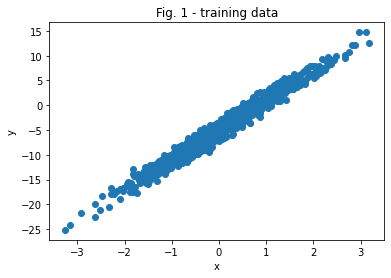

In [12]:
x, y = train_data(n_examples, m, c)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fig. 1 - training data')
W = tf.Variable(np.random.randn()) # Valor inicial aleatório de weight(m)
B = tf.Variable(np.random.randn()) # Valor inicial aleatório de bias(c)

print("loss inicial: {:.3f}".format(loss(x, y, W, B)))

Ajustar *weight* e *bias*


In [20]:
for step in range(training_steps):
    deltaW, deltaB = grad(x, y, W, B) # Gradientes em relação a weight e bias

    change_W = deltaW * learning_rate
    change_B = deltaB * learning_rate

    W.assign_sub(change_W) #  Subtrai change_W de W
    B.assign_sub(change_B) #  Idem para B

    if step == 0 or step % display_step == 0:  # A cada 10 passos
        print("Loss no passo {}:  {:.6f}".format(step, loss(x, y, W, B)))

Loss no passo 0:  35.991173
Loss no passo 10:  23.679577
Loss no passo 20:  15.702220
Loss no passo 30:  10.533242
Loss no passo 40:  7.183961
Loss no passo 50:  5.013761
Loss no passo 60:  3.607550
Loss no passo 70:  2.696376
Loss no passo 80:  2.105965
Loss no passo 90:  1.723396
Loss no passo 100:  1.475503
Loss no passo 110:  1.314874
Loss no passo 120:  1.210789
Loss no passo 130:  1.143344
Loss no passo 140:  1.099640
Loss no passo 150:  1.071321
Loss no passo 160:  1.052971
Loss no passo 170:  1.041080
Loss no passo 180:  1.033374
Loss no passo 190:  1.028381
Loss no passo 200:  1.025146
Loss no passo 210:  1.023049
Loss no passo 220:  1.021690
Loss no passo 230:  1.020810
Loss no passo 240:  1.020239
Loss no passo 250:  1.019869
Loss no passo 260:  1.019630
Loss no passo 270:  1.019475
Loss no passo 280:  1.019374
Loss no passo 290:  1.019309
Loss no passo 300:  1.019266
Loss no passo 310:  1.019239
Loss no passo 320:  1.019221
Loss no passo 330:  1.019210
Loss no passo 340:  1

Imprimindo gráfico final

Loss final:  1.019189
W = 6.0272979736328125, B = -5.009913444519043
Compared with m = 6.000, c = -5.000  of the original line


Text(0.5, 1.0, 'Figure 2: Line of Best Fit')

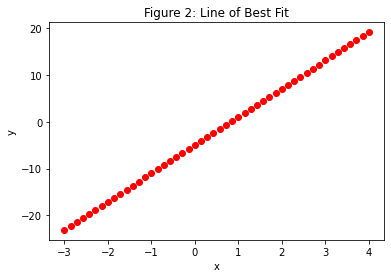

In [24]:
print("Loss final:  {:.6f}".format(loss(x,y,W,B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))
print("Compared with m = {:.3f}, c = {:.3f}".format(m, c)," of the original line")
xs = np.linspace(-3, 4, 50)
ys = W.numpy()*xs + B.numpy()
plt.scatter(xs,ys, c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 2: Line of Best Fit")
